In [367]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from scipy import interpolate
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [368]:
df = pd.read_csv("test_well.csv")
df.head()

,DT_HOUR,EXT_DATA,LIQ_RATE,OIL_RATE,WATER_CUT,PLIN,QGAS,FREQ_HZ,ACTIV_POWER,PED_T,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,U_OTP,COS_PHI
0,2021-03-21 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,67.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-21 00:19:23,0,NaN,NaN,NaN,16.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-21 00:19:26,0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,0.0,37.17,29.5,29.4,29.6,396.0,399.0,399.0,NaN,71.0
3,2021-03-21 00:20:00,0,NaN,NaN,NaN,NaN,NaN,NaN,67.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-21 00:38:32,0,NaN,NaN,NaN,17.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
df.describe()

,EXT_DATA,LIQ_RATE,OIL_RATE,WATER_CUT,PLIN,QGAS,FREQ_HZ,ACTIV_POWER,PED_T,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,U_OTP,COS_PHI
count,20020.000000,146.000000,146.000000,146.000000,6602.000000,146.000000,6595.000000,6592.000000,6595.0,6595.000000,6596.000000,6596.000000,6595.000000,6595.000000,6595.000000,6595.000000,0.0,6595.000000
mean,0.855245,415.724247,45.484384,88.097397,17.879284,2165.620274,41.782948,77.426187,0.0,36.535782,31.122165,31.111098,31.244458,394.055345,398.266262,397.039121,NaN,72.361183
std,10.060267,40.139969,4.454233,0.174743,0.350247,296.131190,1.701624,5.949151,0.0,0.377892,1.419314,1.416309,1.439096,2.871972,2.894213,2.860467,NaN,2.449727
min,0.000000,0.000000,0.000000,87.460000,10.890000,0.000000,0.000000,56.005000,0.0,35.870000,0.000000,0.000000,0.000000,380.000000,385.000000,384.000000,NaN,0.000000
25%,0.000000,403.240000,44.005000,87.980000,17.720000,2060.252500,41.000000,72.955000,0.0,36.170000,30.300000,30.300000,30.400000,392.000000,397.000000,396.000000,NaN,71.000000
50%,0.000000,413.825000,44.995000,88.100000,17.920000,2211.950000,41.000000,73.748000,0.0,36.680000,30.600000,30.600000,30.700000,394.000000,399.000000,397.000000,NaN,72.000000
75%,0.000000,436.287500,47.880000,88.220000,18.080000,2285.165000,43.000000,83.550000,0.0,36.810000,32.200000,32.200000,32.400000,396.000000,401.000000,399.000000,NaN,73.000000
max,120.000000,463.690000,50.900000,88.540000,19.010000,2642.390000,43.000000,83.900000,0.0,39.220000,32.400000,32.400000,32.500000,401.000000,403.000000,404.000000,NaN,74.000000


In [370]:
df = df.drop(["EXT_DATA", "PED_T", "U_OTP"], axis=1)

array([[<Axes: title={'center': 'LIQ_RATE'}>,
        <Axes: title={'center': 'OIL_RATE'}>,
        <Axes: title={'center': 'WATER_CUT'}>,
        <Axes: title={'center': 'PLIN'}>],
       [<Axes: title={'center': 'QGAS'}>,
        <Axes: title={'center': 'FREQ_HZ'}>,
        <Axes: title={'center': 'ACTIV_POWER'}>,
        <Axes: title={'center': 'PINP'}>],
       [<Axes: title={'center': 'I_B'}>, <Axes: title={'center': 'I_A'}>,
        <Axes: title={'center': 'I_C'}>,
        <Axes: title={'center': 'U_AB'}>],
       [<Axes: title={'center': 'U_BC'}>,
        <Axes: title={'center': 'U_CA'}>,
        <Axes: title={'center': 'COS_PHI'}>, <Axes: >]], dtype=object)

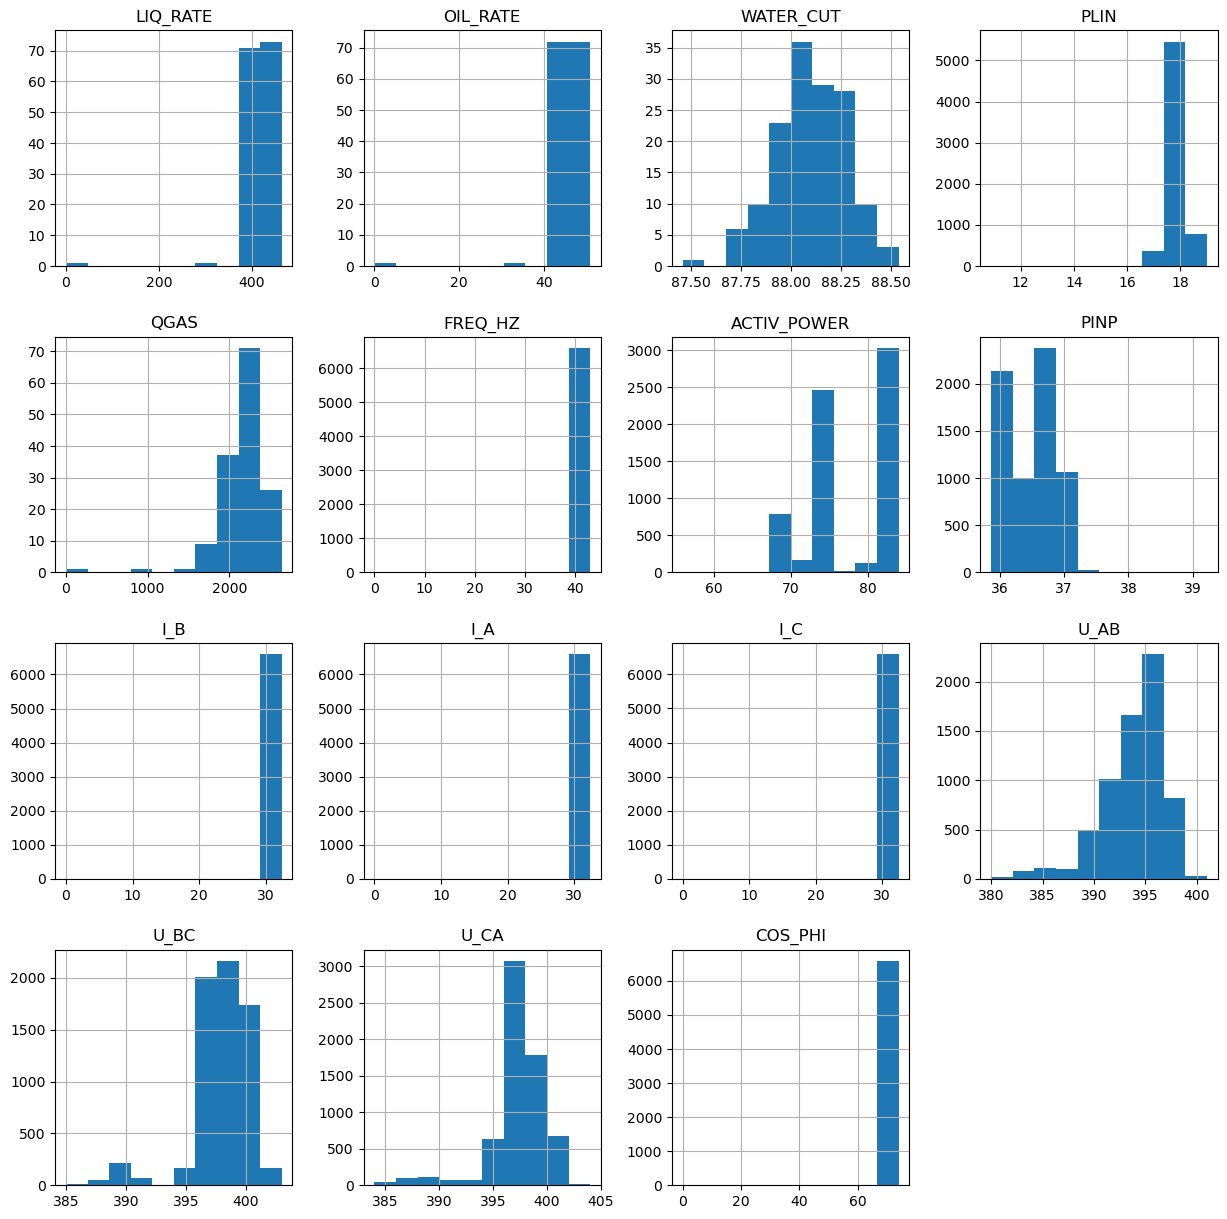

In [371]:
df.hist(figsize=(15, 15))

In [372]:
df.corr()

,LIQ_RATE,OIL_RATE,WATER_CUT,PLIN,QGAS,FREQ_HZ,ACTIV_POWER,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,COS_PHI
LIQ_RATE,1.000000,0.999124,-0.172351,NaN,0.736595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OIL_RATE,0.999124,1.000000,-0.168536,NaN,0.738629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WATER_CUT,-0.172351,-0.168536,1.000000,NaN,-0.157836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLIN,NaN,NaN,NaN,1.00000,NaN,NaN,-0.295260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QGAS,0.736595,0.738629,-0.157836,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FREQ_HZ,NaN,NaN,NaN,NaN,NaN,1.000000,0.999951,-0.768043,0.992460,0.992585,0.991434,-0.229342,-0.234222,-0.229051,0.936505
ACTIV_POWER,NaN,NaN,NaN,-0.29526,NaN,0.999951,1.000000,-0.982436,0.996465,0.986880,0.990603,-0.425663,-0.545837,NaN,0.734255
PINP,NaN,NaN,NaN,NaN,NaN,-0.768043,-0.982436,1.000000,-0.828992,-0.827719,-0.833122,0.347631,0.353105,0.339842,-0.536600
I_B,NaN,NaN,NaN,NaN,NaN,0.992460,0.996465,-0.828992,1.000000,0.998484,0.998387,-0.271918,-0.279560,-0.271348,0.897637
I_A,NaN,NaN,NaN,NaN,NaN,0.992585,0.986880,-0.827719,0.998484,1.000000,0.998397,-0.271361,-0.278743,-0.270548,0.898353


<Axes: >

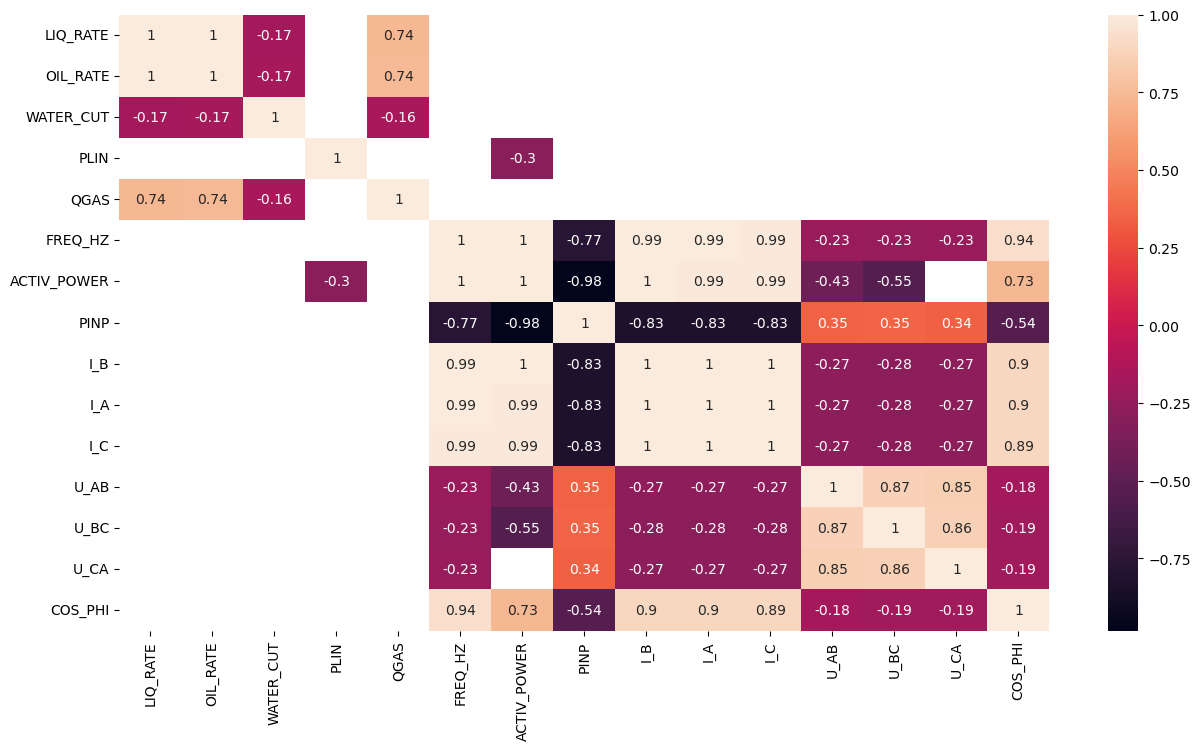

In [373]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, fmt=".2g")

In [374]:
df["DT_HOUR"] = pd.to_datetime(df['DT_HOUR'], format='%Y-%m-%dT')
df["date"] = df['DT_HOUR'].apply(lambda x: x.strftime('%Y-%m-%d'))
df

,DT_HOUR,LIQ_RATE,OIL_RATE,WATER_CUT,PLIN,QGAS,FREQ_HZ,ACTIV_POWER,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,COS_PHI,date
0,2021-03-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,67.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-21
1,2021-03-21 00:19:23,NaN,NaN,NaN,16.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-21
2,2021-03-21 00:19:26,NaN,NaN,NaN,NaN,NaN,40.0,NaN,37.17,29.5,29.4,29.6,396.0,399.0,399.0,71.0,2021-03-21
3,2021-03-21 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,67.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-21
4,2021-03-21 00:38:32,NaN,NaN,NaN,17.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20015,2021-06-20 23:39:18,NaN,NaN,NaN,NaN,NaN,43.0,NaN,36.02,32.2,32.2,32.4,394.0,397.0,397.0,74.0,2021-06-20
20016,2021-06-20 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,83.540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-20
20017,2021-06-20 23:59:47,NaN,NaN,NaN,18.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-20
20018,2021-06-20 23:59:49,NaN,NaN,NaN,NaN,NaN,43.0,NaN,36.03,32.2,32.3,32.3,394.0,399.0,397.0,74.0,2021-06-20


In [375]:
df = df.groupby("date").agg("mean")
df

,LIQ_RATE,OIL_RATE,WATER_CUT,PLIN,QGAS,FREQ_HZ,ACTIV_POWER,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,COS_PHI
date,,,,,,,,,,,,,,,
2021-03-21,388.84,42.61,87.46,17.755278,1853.77,40.0,68.041444,37.168472,29.459722,29.461111,29.552778,395.416667,398.861111,398.958333,71.000000
2021-03-22,390.57,42.59,88.04,17.674028,1809.27,40.0,68.106472,37.155556,29.462500,29.463889,29.563889,393.916667,399.166667,397.638889,71.000000
2021-03-23,395.10,42.47,87.95,17.800694,1822.53,40.0,68.024792,37.147778,29.445833,29.441667,29.537500,395.486111,400.666667,398.083333,71.000000
2021-03-24,389.34,42.54,88.02,17.786528,1855.33,40.0,68.118278,37.144306,29.451389,29.444444,29.534722,395.138889,400.083333,397.805556,71.000000
2021-03-25,391.28,42.55,88.22,17.830278,1827.74,40.0,68.120028,37.135000,29.454167,29.445833,29.550000,396.805556,399.916667,398.111111,71.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16,435.36,47.78,88.12,17.784167,2247.43,43.0,83.571292,36.037500,32.233333,32.198611,32.381944,394.777778,398.430556,396.736111,73.000000
2021-06-17,455.25,49.96,88.43,17.896250,1416.76,43.0,83.633875,36.036111,32.219444,32.194444,32.362500,392.361111,396.583333,395.194444,73.000000
2021-06-18,433.74,47.62,88.32,17.996143,2166.77,43.0,83.449194,36.037361,32.212500,32.205556,32.355556,391.611111,396.388889,395.000000,73.000000


In [376]:
df = df.dropna(subset=['LIQ_RATE'])
df

,LIQ_RATE,OIL_RATE,WATER_CUT,PLIN,QGAS,FREQ_HZ,ACTIV_POWER,PINP,I_B,I_A,I_C,U_AB,U_BC,U_CA,COS_PHI
date,,,,,,,,,,,,,,,
2021-03-21,388.84,42.61,87.46,17.755278,1853.77,40.0,68.041444,37.168472,29.459722,29.461111,29.552778,395.416667,398.861111,398.958333,71.000000
2021-03-22,390.57,42.59,88.04,17.674028,1809.27,40.0,68.106472,37.155556,29.462500,29.463889,29.563889,393.916667,399.166667,397.638889,71.000000
2021-03-23,395.10,42.47,87.95,17.800694,1822.53,40.0,68.024792,37.147778,29.445833,29.441667,29.537500,395.486111,400.666667,398.083333,71.000000
2021-03-24,389.34,42.54,88.02,17.786528,1855.33,40.0,68.118278,37.144306,29.451389,29.444444,29.534722,395.138889,400.083333,397.805556,71.000000
2021-03-25,391.28,42.55,88.22,17.830278,1827.74,40.0,68.120028,37.135000,29.454167,29.445833,29.550000,396.805556,399.916667,398.111111,71.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16,435.36,47.78,88.12,17.784167,2247.43,43.0,83.571292,36.037500,32.233333,32.198611,32.381944,394.777778,398.430556,396.736111,73.000000
2021-06-17,455.25,49.96,88.43,17.896250,1416.76,43.0,83.633875,36.036111,32.219444,32.194444,32.362500,392.361111,396.583333,395.194444,73.000000
2021-06-18,433.74,47.62,88.32,17.996143,2166.77,43.0,83.449194,36.037361,32.212500,32.205556,32.355556,391.611111,396.388889,395.000000,73.000000


<Axes: >

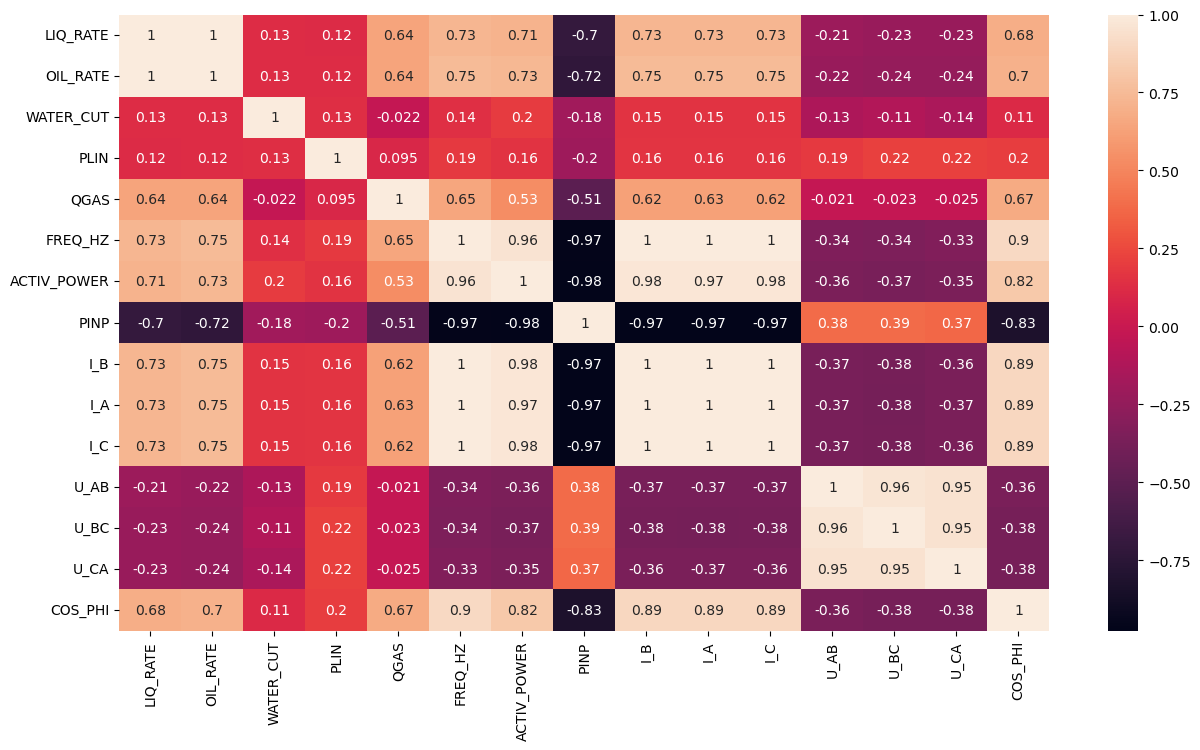

In [377]:
df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, fmt=".2g")

# Построение модели


In [378]:
df = df[["LIQ_RATE", "ACTIV_POWER", "PINP"]]
df = df.dropna()
df

,LIQ_RATE,ACTIV_POWER,PINP
date,,,
2021-03-21,388.84,68.041444,37.168472
2021-03-22,390.57,68.106472,37.155556
2021-03-23,395.10,68.024792,37.147778
2021-03-24,389.34,68.118278,37.144306
2021-03-25,391.28,68.120028,37.135000
...,...,...,...
2021-06-16,435.36,83.571292,36.037500
2021-06-17,455.25,83.633875,36.036111
2021-06-18,433.74,83.449194,36.037361


In [379]:
X = df[["ACTIV_POWER", "PINP"]]
Y = df["LIQ_RATE"]

In [380]:
poly = PolynomialFeatures(degree=2)

In [381]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [382]:
model = LinearRegression()
model.fit(poly.fit_transform(X_train), Y_train)

LinearRegression()

In [383]:
x1_min, x1_max = X_test['ACTIV_POWER'].min() - 1, X_test['ACTIV_POWER'].max() + 1
x2_min, x2_max = X_test['PINP'].min() - 1, X_test['PINP'].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
xx_poly = poly.transform(np.c_[xx1.ravel(), xx2.ravel()])

C:\Users\Salavat\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [384]:
yy = model.predict(xx_poly)

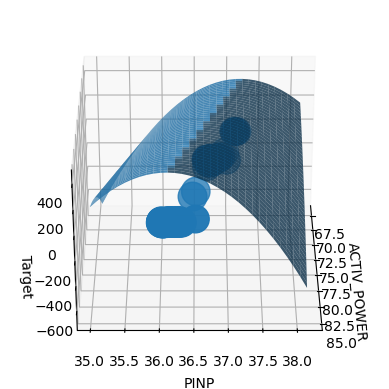

In [394]:
fig = plt.figure()
ax = fig.add_subplot( projection = '3d')
ax.plot_surface(xx1,xx2,yy.reshape(xx1.shape), alpha = 0.8)
plt.scatter(df['ACTIV_POWER'], df['PINP'], df['LIQ_RATE'])
ax.set_xlabel('ACTIV_POWER')
ax.set_ylabel('PINP')
ax.set_zlabel('Target')
ax.view_init(elev = 30, azim = 0)

In [395]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 6,
 'coef_': array([ 0.00000000e+00,  1.13937288e+03,  1.84719646e+04, -8.60877554e-01,
        -2.74395940e+01, -2.23530121e+02]),
 'rank_': 5,
 'singular_': array([6.97047568e+03, 7.29644163e+01, 3.10717686e+01, 6.72991101e-02,
        1.11774768e-03, 0.00000000e+00]),
 'intercept_': -381523.3766124057}

In [396]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))
print('R2 Score:', metrics.r2_score(Y_test, Y_predicted))
print("MAPE: ", metrics.mean_absolute_percentage_error(Y_test, Y_predicted))

NameError: name 'Y_predicted' is not defined